# Capstone project 
### Investment and trading project - Predicting stock prices and returns based on machine learning

## 1. Data exploration: get data from quandle api. We primarily choose indices across the world. 

In [17]:
%matplotlib inline

import sys
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt

local_python_path = '/Library/Python/2.7/site-packages'
sys.path.append(local_python_path)

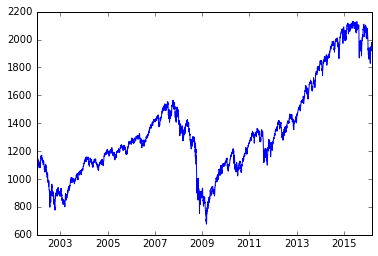

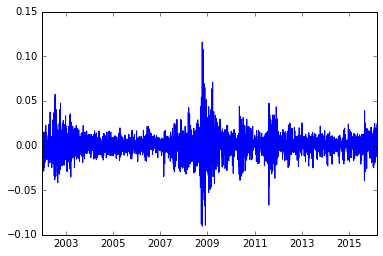

In [18]:
def getStockPrice(symbol, start, end):
    """
    Adjusted close price from quandle.
    """
    import quandl
    mydata = quandl.get(symbol, start_date=start, end_date=end)
    return mydata["Adjusted Close"]

def getReturns(price):
    """
    Get stock returns
    """
    return price.pct_change()[1:]

yahoo_close = getStockPrice("YAHOO/INDEX_GSPC", "2001-12-31", "2016-03-01")

returns = getReturns(yahoo_close)
returns
plt.figure(1)
plt.plot(yahoo_close)

plt.figure(2)
plt.plot(returns)

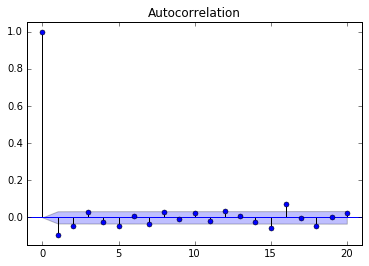

In [24]:
import statsmodels.graphics.tsaplots as tsplots
tsplots.plot_acf(returns, lags= 20)
plt.show()

In [23]:
returns[1:10]

Date
2002-01-03    0.009180
2002-01-04    0.006213
2002-01-07   -0.006499
2002-01-08   -0.003588
2002-01-09   -0.004799
2002-01-10    0.001221
2002-01-11   -0.009468
2002-01-14   -0.006276
2002-01-15    0.006834
Name: Adjusted Close, dtype: float64

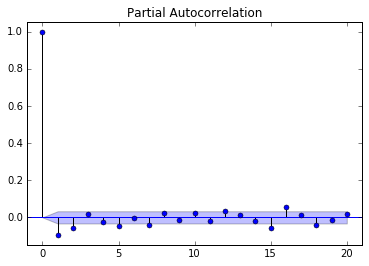

In [25]:
tsplots.plot_pacf(returns, lags= 20)
plt.show()

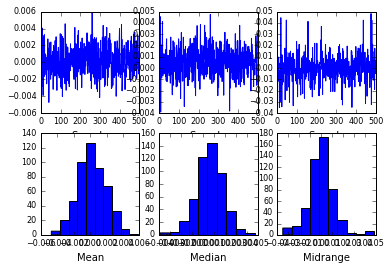

In [14]:
from pandas.tools.plotting import bootstrap_plot
bootstrap_plot(returns, size = 50)
plt.show()


Find out the following facts about the data set
- Total number of data points
- Number of positive returns
- Number of negative returns
- Average annualized returns
- Standard deviation
- Sharpe ratio
- Cumulative returns

In [35]:
total_data = len(returns)
positive_returns = sum(x > 0 for x in returns)
negative_returns = sum(x < 0 for x in returns)
annualized_returns = np.mean(returns)*12
std = np.std(returns)*np.sqrt(12)
Sharpe = annualized_returns/std
Cumulative_returns = np.log(yahoo_close[-1]/yahoo_close[0])

print "total_data: {}".format(total_data)
print "positive returns: {}".format(positive_returns)
print "negative returns: {}".format(negative_returns)
print "annualized returns: {}".format(annualized_returns)
print "standard deviation: {}".format(std)
print "Sharpe ratio: {}".format(Sharpe)
print "Cumulative returnsL {}".format(Cumulative_returns)

total_data: 3565
positive returns: 1917
negative returns: 1646
annualized returns: 0.00277060762507
standard deviation: 0.0433145502002
Sharpe ratio: 0.063964825036
Cumulative returnsL 0.544172208271


## Preparing the data

In [44]:
num_train = 0.75 * len(returns)
num_test = len(returns) - num_train
num_all = len(returns)
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(returns[1:-1], returns[2:len(returns)], test_size = float(num_test)/num_all, random_state = 42 )



### 1. Use supervised learning algorithms to predict stock returns. Use lagged returns as features. 

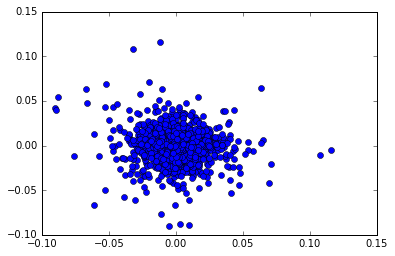

In [38]:
y = returns[1:len(returns)]
features = returns[0:len(returns)-1]
plt.plot(features, y, 'o')

In [54]:
X_train

Date
2002-01-22   -0.007334
2002-06-13   -0.010488
2008-06-03   -0.005788
2009-09-28    0.017810
2008-06-12    0.003280
2005-11-07    0.002188
2013-11-21    0.008129
2011-03-18    0.004310
2014-09-25   -0.016169
2003-11-17   -0.006398
2003-12-12    0.002735
2015-06-24   -0.007353
2015-06-03    0.002119
2005-04-22   -0.006750
2010-02-18    0.006585
2006-07-06    0.002494
2014-10-24    0.007053
2008-11-17   -0.025810
2013-11-01    0.002903
2005-09-15    0.000464
2008-05-29    0.005335
2013-12-26    0.004746
2010-06-08    0.010976
2007-05-31    0.000255
2004-08-11   -0.003012
2008-07-28   -0.018597
2003-06-11    0.012835
2002-07-18   -0.027019
2008-11-26    0.035328
2012-03-27   -0.002817
                ...   
2006-09-15    0.002568
2011-03-28   -0.002748
2005-10-18   -0.010050
2006-10-30    0.000428
2011-08-31    0.004922
2013-05-06    0.001908
2015-11-05   -0.001132
2008-01-10    0.007948
2011-07-01    0.014410
2005-01-24   -0.003528
2015-06-09    0.000418
2008-09-12    0.002122
2002-0

In [75]:
threshold = 0
# Train a supervised model and use the model to predict future stock returns
import time

def train_classifier(clf, X_train, y_train):
    print "Training {}...".format(clf.__class__.__name__)
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    print "Done!\nTraining time (secs): {:.3f}".format(end - start)

from sklearn.svm import SVC
#clf = SVC()
#from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
#clf = LinearRegression()# MLPClassifier(algorithm='l-bfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1) #SVC()
from sklearn.naive_bayes import GaussianNB
#clf = GaussianNB()
clf = LinearRegression()
from sklearn.linear_model import LogisticRegression
# Fit model to training data

train_classifier(clf, X_train.reshape(len(X_train), 1), y_train)  # note: using entire training set here
print clf  # you can inspect the learned model by printing it

def predict_returns(clf, X_test):
    return clf.predict(X_test.reshape(len(X_test), 1))


Training LinearRegression...
Done!
Training time (secs): 0.001
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [76]:
from sklearn.metrics import mean_squared_error
y_test_pred = predict_returns(clf, X_test)
mse = mean_squared_error(y_test_pred, y_test)
rmse = np.sqrt(mse)


In [120]:

def sup_trading_strat(predict_returns, y_test):
    total_returns = []
    for i in range(1, len(predict_returns)):
        vol = volatility_estimate(y_test[0:i])
        
        if predict_returns[i-1] >= threshold:
            total_returns.append(y_test[i] * 0.4 / vol)
        elif predict_returns[i-1] < -threshold:
            total_returns.append(-y_test[i] * 0.4 / vol)
            
    avg_ret = np.mean(total_returns) * 12
    avg_std = np.std(total_returns) * np.sqrt(12)
    sharpe = avg_ret/avg_std
    cum = np.cumsum(total_returns)
    return avg_ret, sharpe, cum

avg_ret, sharpe, cum = sup_trading_strat(y_test_pred, y_test)

# calc avg returns, sharpe, cumulative

0.00119568578202
0.116192812531


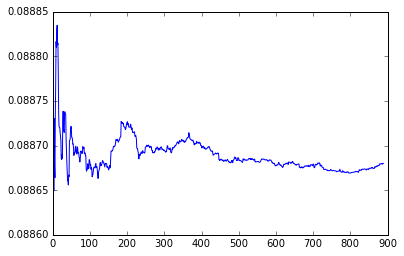

In [121]:
print avg_ret
print sharpe
plt.plot(cum)

### 2. Use unsupervised learning algorithms to predict the sign of stock returns. Use lagged returns as features

In [122]:
X = returns[0:-1]
Y = returns[1:len(returns)]
#Y_label = [1 if i >0 else -1 for i in Y]
X_train_un, X_test_un, y_train_un, y_test_un = train_test_split(X, Y, test_size = float(num_test)/num_all, random_state = 42 )
y_train_label = [1 if i >0 else -1 for i in y_train_un]
y_test_label = [1 if i >0 else -1 for i in y_test_un]

In [123]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score
clf2 = GradientBoostingClassifier()
train_classifier(clf2, X_train_un.reshape(len(X_train_un), 1), y_train_label)
def predict_return_sign(X_test_un):
    return clf2.predict(X_test_un)

pred_label = predict_return_sign(X_test_un.reshape(len(X_test_un), 1))
score = f1_score(pred_label, y_test_label)
print score


Training GradientBoostingClassifier...
Done!
Training time (secs): 0.113
0.687898089172


In [189]:
def unsup_trading_strat(predict_returns, y_test):
    total_returns = []
    vols = []
    for i in range(1, len(predict_returns)):
        vol = volatility_estimate(y_test[0:i])
        vols.append(vol)
        if predict_returns[i-1] >= 0:
            total_returns.append(y_test[i] * 0.4 / vol)
        else:
            total_returns.append(-y_test[i] * 0.4 / vol)
            
    avg_ret = np.mean(total_returns) * 12
    avg_std = np.std(total_returns) * np.sqrt(12)
    sharpe = avg_ret/avg_std
    cum = np.cumsum(total_returns)
    return avg_ret, sharpe, cum, total_returns, vols

In [190]:
un_ret, un_sharpe, un_cum, new_returns, vols = unsup_trading_strat(pred_label, y_test_un)

0.18068981678
Average return: 0.0205052750344
Sharpe: 0.230684349348


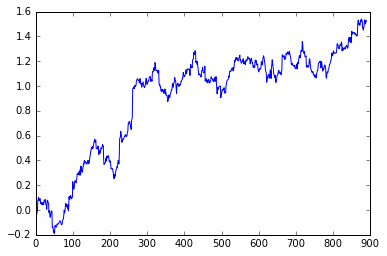

In [191]:
print volatility_estimate(y_test[0:10])
print "Average return: {}".format(un_ret)
print "Sharpe: {}".format(un_sharpe)
plt.plot(un_cum)

In [159]:
vols

[0.4,
 0.1053877448533192,
 0.16999480226017141,
 0.11730231503575328,
 0.087464283217516203,
 0.069422606739448514,
 0.058212002857644579,
 0.094229580778349892,
 0.081786157176495053,
 0.073048254995888254,
 0.067829984188946216,
 0.059732645077329498,
 0.054476344000222533,
 0.049107370013397135,
 0.045794909441839879,
 0.043421985746569809,
 0.040216471833057189,
 0.036982929886583547,
 0.034817894321576108,
 0.032284037096060439,
 0.031436954232327612,
 0.029348768197260292,
 0.027495914205769124,
 0.026160651487291593,
 0.027339201468380141,
 0.025819269738115314,
 0.024580389615364292,
 0.023582323803612335,
 0.023489552269022433,
 0.02267283879801478,
 0.021596584656377503,
 0.02204029319070561,
 0.0269426612297924,
 0.025974838023063003,
 0.024954479293229637,
 0.024141942937260619,
 0.023178321083476727,
 0.027307686044998534,
 0.026717949443573488,
 0.026215970821088425,
 0.025838767440483794,
 0.025030842483384927,
 0.025141810195295218,
 0.024638081630703974,
 0.0238668914

## Volatility model. 
### Use volatility to determine the size of this instrument to maximize the return per risk. 

In [192]:
def volatility_estimate(r_t):
    var = 0
    r_m = np.mean(r_t)
    
    total_num = len(r_t)
    total_sum = total_num*(total_num+1)/float(2) 
    delta = 0.7
    if total_num == 1:
        return 0.4
    
    for i in range(0, total_num):
        if total_num - i < 30:
            #delta_i = (i+1)/float(total_sum) #(1-delta)* delta_i * 
            var = var + ((1-delta) * total_num +30*delta)/float(30) * (r_t[i] - r_m)**2
        else:
            var = var + delta * (r_t[i] - r_m)**2 
    return np.sqrt(var * 261/float(total_num))


In [188]:
volatility_estimate(y_test)

0.21821118637690951

In [184]:
np.std(y_test)*np.sqrt(261)

0.21758692921160824